# Canais quânticos para qudits

Uma dinâmica escrita como uma representação da soma de operadores de Kraus,
$$\Lambda(\rho) = \sum_{j}K_{j}\rho K_{j}^{\dagger},$$
com os operadores de Kraus $K_{j}$ satisfazendo a restrição
$$\sum_{j}K_{j}^{\dagger}K_{j}=\mathbb{I},$$
é uma operação completamente positiva e que preserva o traço.

A operação quântica acima, aplicada a um sistema $A$, pode ser obtida a partir da isometria
$$|\Psi\rangle_{AB} = V_{AB}\big(|\psi\rangle_{A}\otimes|0\rangle_{B}\big) = \sum_{j}\big(K_{j}|\psi\rangle_{A}\big)\otimes|j\rangle_{B},$$
ou seja
$$Tr_{B}\big(|\Psi\rangle_{AB}\langle\Psi|\big) = \Lambda(\psi).$$

Assim como fizemos para medidas gerais, podemos implementar operações quânticas usando protocolos de preparação de estados. Uma vez que conhecemos os operadores de Kraus $K_{j}$, podemos calcular o estado $|\Psi\rangle_{AB}$. Uma vez preparado este estado, via algoritmo de preparação de estados, traçamos (ignoramos) o sistema $B$, obtendo assim o estado evoluído do sistema $A$, que será $\Lambda(\rho)$. 

OBS. Uma operação quântica geral, ou mapa completamente positivo que preserva o traço, é equivalente a um medida quântica geral não seletiva.

OBS. Podemos, de uma medida seletiva no sistema $B$ e pós-seleção, estudar a ação de cada um dos operadores de Kraus $K_j$.

## Estado inicial misto

Vamos considerar que o sistema $A$ inicia no estado misto
$$\rho_A = \sum_{l,m=0}^{d-1}\rho_{l,m}^{A}|l\rangle_{A}\langle m|.$$
O mapa acima vale para qualquer estado $|\psi\rangle$, inclusive aqueles da base computacional, i.e.,
$$V_{AB}\big(|l\rangle_{A}\otimes|0\rangle_{B}\big) = \sum_{j}\big(K_{j}|l\rangle_{A}\big)\otimes|j\rangle_{B}.$$
Com isso, podemos escrever o estado global evoluído como segue
\begin{align}
\tilde{\rho}_{AB} & = V_{AB}\big(\rho_{A}\otimes|0\rangle_{B}\langle 0|\big)V_{AB}^{\dagger} \\
& = V_{AB}\Big(\sum_{l,m=0}^{d-1}\rho_{l,m}^{A}|l\rangle_{A}\langle m|\otimes|0\rangle_{B}\langle 0|\Big)V_{AB}^{\dagger} \\
& = \sum_{l,m=0}^{d-1}\rho_{l,m}^{A}V_{AB}\big(|l\rangle_{A}\otimes|0\rangle_{B}\big)\big(\langle m|_{A}\otimes\langle 0|_{B}\big)V_{AB}^{\dagger} \\
& = \sum_{l,m=0}^{d-1}\rho_{l,m}^{A}\Big(\sum_{j}\big(K_{j}|l\rangle_{A}\big)\otimes|j\rangle_{B}\Big)\Big(\sum_{k}\big(\langle m|_{A}K_{k}^{\dagger}\big)\otimes\langle k|_{B}\Big) \\
& = \sum_{j,k}K_{j}\Big(\sum_{l,m=0}^{d-1}\rho_{l,m}^{A}|l\rangle_{A}\langle m|_{A}\Big)K_{k}^{\dagger}\otimes|j\rangle_{B}\langle k| \\
& = \sum_{j,k}K_{j}\rho_{A}K_{k}^{\dagger}\otimes|j\rangle_{B}\langle k|.
\end{align}

Assim
$$Tr_{B}(\tilde{\rho}_{AB}) = \sum_{j}K_{j}\rho_{A}K_{j}^{\dagger}=\Lambda(\rho_A).$$

No entanto, isso não resolve a questão de como implementar esse mapa para estados iniciais mistos, uma vez que teríamos que preparar $\tilde{\rho}_{AB}$. Vejamos duas formas de fazer isso. Conhecendo $\rho_{A}$ e $\{K_{j}\}$ podemos calcular 
$$\tilde{\rho}_{AB} = \sum_{l,m=0}^{d-1}\rho_{l,m}^{A}\Big(\sum_{j}\big(K_{j}|l\rangle_{A}\big)\otimes|j\rangle_{B}\Big)\Big(\sum_{k}\big(\langle m|_{A}K_{k}^{\dagger}\big)\otimes\langle k|_{B}\Big).$$
Ou seja, teremos que calcular $\sum_{j}\big(K_{j}|l\rangle_{A}\big)\otimes|j\rangle_{B}$ para todos os estados $|l\rangle_{A}$ da base computacional. 
Tendo calculado e __diagonalizado__ essa matriz densidade, 
$$\tilde{\rho}_{AB} = \sum_{j=0}^{d_{AB}-1}\lambda_{j}|\lambda_{j}\rangle_{AB}\langle \lambda_{j}|,$$ podemos obter o estado evoluído sob a operação quântica $\Lambda$ preparando o estado misto $\tilde{\rho}_{AB}$ em um computador quântico através de uma purificação
$$|\Phi\rangle_{ABC} = \sum_{j=0}^{d_{AB}-1}\sqrt{\lambda_{j}}|\lambda_{j}\rangle_{AB}\otimes|j\rangle_{C}.$$
Tomando o traço sobre $B$ e $C$ obtemos o estado esperado:
$$\Lambda(\rho_{A}) = Tr_{BC}\big(|\Phi\rangle_{ABC}\langle\Phi|\big).$$

Uma __2ª forma__ de fazer isto para estados mistos é a seguinte. Começamos notando que qualquer estado misto pode ser diagonalizado:
$$\rho_{A} = \sum_{k=0}^{d_{A}-1}r_{k}|r_{k}\rangle_{A}\langle r_{k}|.$$
Os operadores de Kraus são operadores linerares. Com isso vem que
\begin{align}
\Lambda(\rho_{A}) & = \sum_{j}K_{j}\rho_{A}K_{j}^{\dagger} \\
& = \sum_{j}K_{j}\sum_{k=0}^{d_{A}-1}r_{k}|r_{k}\rangle_{A}\langle r_{k}|K_{j}^{\dagger} \\
& = \sum_{k=0}^{d_{A}-1}r_{k}\sum_{j}K_{j}|r_{k}\rangle_{A}\langle r_{k}|K_{j}^{\dagger} \\
& = \sum_{k=0}^{d_{A}-1}r_{k}\Lambda(|r_{k}\rangle).
\end{align}

Assim, podemos simular o canal quântico aplicado a um estado misto primeiramente obtendo a decomposição espectral de $\rho_{A}$, depois preparando
$$|\Psi_{k}\rangle_{AB} = \sum_{j}\big(K_{j}|r_{k}\rangle\big)\otimes|j\rangle_{B}$$
para 
$$k=0,\cdots,d_{A}-1$$
e traçando o sistema $B$ para obter 
$$\Lambda(|r_{k}\rangle) = Tr_{B}\big(|\Psi_{k}\rangle_{AB}\langle\Psi_{k}|\big)$$
e finalmente calculando a mistura estatísitca 
$$\sum_{k}r_{k}\Lambda(|r_{k}\rangle)=\Lambda(\rho_A).$$

## Canal de Pauli para qubits

Este canal é importante em criptografia e é definido como
$$\Lambda_{p}(\rho) = \sum_{j,k=0}^{1}p_{j,k}Z^{j}X^{k}\rho X^{k}Z^{j},$$
em que $X,Z$ são as matrizes de Pauli e $p_{j,k}$ é uma distribuição de probabilidades.
Usando $ZX=-iY$ obtemos
\begin{align}
\Lambda_{p}(\rho) & = p_{0,0}\rho + p_{0,1}X\rho X + p_{1,0}Z\rho Z + p_{1,1}ZX\rho XZ \\
& = p_{0,0}\rho + p_{0,1}X\rho X + p_{1,0}Z\rho Z + p_{1,1}(-i)Y\rho iY \\
& = p_{0,0}\rho + p_{0,1}X\rho X + p_{1,0}Z\rho Z + p_{1,1}Y\rho Y \\
& =: p_{I}\rho + p_{X}X\rho X + p_{Z}Z\rho Z + p_{Y}Y\rho Y \\
& =: K_{0}\rho K_{0}^{\dagger} + K_{1}\rho K_{1}^{\dagger} + K_{2}\rho K_{2}^{\dagger} + K_{3}\rho K_{3}^{\dagger},
\end{align}
com
$$K_{0}=\sqrt{p_{I}}\mathbb{I},\  K_{1} = \sqrt{p_{X}}X,\ K_{2} = \sqrt{p_{Z}}Z,\ K_{3} = \sqrt{p_{Y}}Y.$$

In [1]:
%run init.ipynb

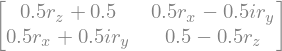

In [2]:
rx,ry,rz = symbols('r_x r_y r_z')
rho1qb = (1/2)*(id(2) + rx*pauli(1) + ry*pauli(2) + rz*pauli(3))
rho1qb

In [3]:
pI,pX,pZ,pY = symbols('p_I p_X p_Z p_Y')
K0 = sqrt(pI)*id(2); K1 = sqrt(pX)*pauli(1); K2 = sqrt(pZ)*pauli(3); K3 = sqrt(pY)*pauli(2)

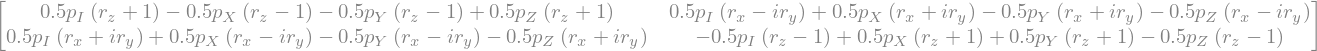

In [5]:
rho_p = K0*rho1qb*K0 + K1*rho1qb*K1 + K2*rho1qb*K2 + K3*rho1qb*K3
simplify(rho_p)

Vemos assim que o vetor de Bloch evoluído no tempo para um qubit sob o canal de Pauli é (usamos também $\sum_{j=0}^{3}p_{j}=1$)
\begin{align}
& r_{x}^{p} = \big(p_{I}+p_{X}-p_{Z}-p_{Y}\big)r_{x}, \\
& r_{y}^{p} = \big(p_{I}-p_{X}-p_{Z}+p_{Y}\big)r_{y}, \\
& r_{z}^{p} = \big(p_{I}-p_{X}+p_{Z}-p_{Y}\big)r_{z}.
\end{align}

### Implementação via preparação de estados

Começamos com o cálculo de $|\Psi\rangle_{AB}$. Usamos 
$$|\psi\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle$$
e $Y|0\rangle=i|1\rangle$ e $Y|1\rangle=-i|0\rangle$ para escrever
\begin{align}
K_{0}|\psi\rangle & = \sqrt{p_{I}}\mathbb{I}|\psi\rangle = \sqrt{p_{I}}\big(\cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle\big), \\ 
K_{1}|\psi\rangle & = \sqrt{p_{X}}X|\psi\rangle = \sqrt{p_{X}}\big(\cos(\theta/2)|1\rangle + e^{i\phi}\sin(\theta/2)|0\rangle\big), \\
K_{2}|\psi\rangle & = \sqrt{p_{Z}}Z|\psi\rangle = \sqrt{p_{Z}}\big(\cos(\theta/2)|0\rangle - e^{i\phi}\sin(\theta/2)|1\rangle\big), \\
K_{3}|\psi\rangle & = \sqrt{p_{Y}}Y|\psi\rangle = i\sqrt{p_{Y}}\big(\cos(\theta/2)|1\rangle - e^{i\phi}\sin(\theta/2)|0\rangle\big).
\end{align}

Teremos assim que
\begin{align}
|\Psi\rangle_{AB} & = K_{0}|\psi\rangle_{A}\otimes|0\rangle_{B} + K_{1}|\psi\rangle_{A}\otimes|1\rangle_{B} + K_{2}|\psi\rangle_{A}\otimes|2\rangle_{B} + K_{3}|\psi\rangle_{A}\otimes|3\rangle_{B} \\
& = \sqrt{p_{I}}\big(\cos(\theta/2)|0\rangle_{A} + e^{i\phi}\sin(\theta/2)|1\rangle_{A}\big)\otimes|0\rangle_{B} + \sqrt{p_{X}}\big(\cos(\theta/2)|1\rangle_{A} + e^{i\phi}\sin(\theta/2)|0\rangle_{A}\big)\otimes|1\rangle_{B} \\
& + \sqrt{p_{Z}}\big(\cos(\theta/2)|0\rangle_{A} - e^{i\phi}\sin(\theta/2)|1\rangle_{A}\big)\otimes|2\rangle_{B} + i\sqrt{p_{Y}}\big(\cos(\theta/2)|1\rangle_{A} - e^{i\phi}\sin(\theta/2)|0\rangle_{A}\big)\otimes|3\rangle_{B} \\
& = \sqrt{p_{I}}\cos(\theta/2)|00\rangle_{AB} + \sqrt{p_{I}}e^{i\phi}\sin(\theta/2)|10\rangle_{AB} + \sqrt{p_{X}}\cos(\theta/2)|11\rangle_{AB} + \sqrt{p_{X}}e^{i\phi}\sin(\theta/2)|01\rangle_{AB} \\
& + \sqrt{p_{Z}}\cos(\theta/2)|02\rangle_{AB} - \sqrt{p_{Z}}e^{i\phi}\sin(\theta/2)|12\rangle_{AB} + \sqrt{p_{Y}}\cos(\theta/2)|13\rangle_{AB} - \sqrt{p_{Y}}e^{i\phi}\sin(\theta/2)|03\rangle_{AB} \\
& \doteq \sqrt{p_{I}}\cos(\theta/2)|000\rangle_{abc} + \sqrt{p_{I}}e^{i\phi}\sin(\theta/2)|100\rangle_{abc} + \sqrt{p_{X}}\cos(\theta/2)|101\rangle_{abc} + \sqrt{p_{X}}e^{i\phi}\sin(\theta/2)|001\rangle_{abc} \\
& + \sqrt{p_{Z}}\cos(\theta/2)|010\rangle_{abc} - \sqrt{p_{Z}}e^{i\phi}\sin(\theta/2)|110\rangle_{abc} + i\sqrt{p_{Y}}\cos(\theta/2)|111\rangle_{abc} - i\sqrt{p_{Y}}e^{i\phi}\sin(\theta/2)|011\rangle_{abc},
\end{align}
em que usamos o qubit $a$ para representar $A$ e os qubits $b$ e $c$ para representar $B$.

### Casos particulares
Denotemos
$$\Lambda_{p} = \Lambda_{p}^{p_{I},p_{X},P_{Z},P_{Y}}.$$
O canal de Pauli generaliza os canais bit flip, phase flip, bit-phase flip e depolarizing:
\begin{align}
& \Lambda_{bf}(\rho) := p\rho + (1-p)X\rho X \equiv \Lambda_{p}^{p,1-p,0,0}, \\
& \Lambda_{pf}(\rho) := p\rho + (1-p)Z\rho Z \equiv \Lambda_{p}^{p,0,1-p,0}, \\
& \Lambda_{bpf}(\rho) := p\rho + (1-p)Y\rho Y \equiv \Lambda_{p}^{p,0,0,1-p}, \\
& \Lambda_{d}(\rho) := p\rho + (1-p)\frac{\mathbb{I}_{2}}{2} \equiv \Lambda_{p}^{(1+3p)/4,(1-p)/4,(1-p)/4,(1-p)/4},
\end{align}
com $p\in[0,1]$.

Vimos em nosso estudo da álgebra de qudits os __operadores de Heisenberg-Weyl__:
\begin{align}
& X(j) = \sum_{k=0}^{d-1}|j\oplus k\rangle\langle k|, \\
& Z(j) = \sum_{k=0}^{d-1}e^{i2\pi jk/d}|k\rangle\langle k|.
\end{align}
Para $d=2$ temos
\begin{align}
X(0) & = \sum_{k=0}^{1}|0\oplus k\rangle k| = |0\oplus 0\rangle\langle 0| + |0\oplus 1\rangle\langle 1| = |0\rangle\langle 0| + |1\rangle\langle 1| = \mathbb{I}, \\
X(1) & = \sum_{k=0}^{1}|1\oplus k\rangle k| = |1\oplus 0\rangle\langle 0| + |1\oplus 1\rangle\langle 1| = |1\rangle\langle 0| + |0\rangle\langle 1| = X, \\
Z(0) & = \sum_{k=0}^{1}e^{i2\pi 0k/2}|k\rangle\langle k| = |0\rangle\langle 0| + |1\rangle\langle 1| = \mathbb{I}, \\ 
Z(1) & = \sum_{k=0}^{1}e^{i2\pi k/2}|k\rangle\langle k| = |0\rangle\langle 0| + e^{i\pi}|1\rangle\langle 1| = Z.
\end{align}

Também verificamos a operação TWIRL:
$$\sum_{j,k=0}^{d-1}X(j)Z(k)\rho Z(k)^{\dagger}X(j)^{\dagger} = d\mathbb{I}_{d}.$$
Para $d=2$ teremos
\begin{align}
2\mathbb{I}_{2} & = \sum_{j,k=0}^{1}X(j)Z(k)\rho Z(k)^{\dagger}X(j)^{\dagger} \\
& = X(0)Z(0)\rho Z(0)^{\dagger}X(0)^{\dagger} + X(0)Z(1)\rho Z(1)^{\dagger}X(0)^{\dagger} \\
& + X(1)Z(0)\rho Z(0)^{\dagger}X(1)^{\dagger} + X(1)Z(1)\rho Z(1)^{\dagger}X(1)^{\dagger} \\
& = \rho + Z\rho Z + X\rho X + XZ\rho ZX \\
& = \rho + Z\rho Z + X\rho X + Y\rho Y.
\end{align}
Com isso, o canal depolarizing pode ser reescrito como
\begin{align}
\Lambda_{d}(\rho) & = p\rho + \frac{1-p}{4}2\mathbb{I}_{2} \\
& = p\rho + \frac{1-p}{4}\big(\rho + Z\rho Z + X\rho X + Y\rho Y\big) \\
& = \frac{1+3p}{4}\rho + \frac{1-p}{4}\big(X\rho X +Z\rho Z + Y\rho Y\big).
\end{align}

Com isso, o estado a ser preparado para simular o o canal bit flip,
$$p_{I}=p,\ p_{X}=1-p,\ p_{Z}=p_{Y}=0,$$
é
\begin{align}
|\Psi_{bf}\rangle_{AB} & = \sqrt{p}\cos(\theta/2)|000\rangle_{abc} + \sqrt{p}e^{i\phi}\sin(\theta/2)|100\rangle_{abc} + \sqrt{1-p}\cos(\theta/2)|101\rangle_{abc} + \sqrt{1-p}e^{i\phi}\sin(\theta/2)|001\rangle_{abc} \\
& + \sqrt{0}\cos(\theta/2)|010\rangle_{abc} - \sqrt{0}e^{i\phi}\sin(\theta/2)|110\rangle_{abc} + \sqrt{0}\cos(\theta/2)|111\rangle_{abc} - \sqrt{0}e^{i\phi}\sin(\theta/2)|011\rangle_{abc} \\
& = \big(\sqrt{p}\cos(\theta/2)|00\rangle_{ac} + \sqrt{p}e^{i\phi}\sin(\theta/2)|10\rangle_{ac} + \sqrt{1-p}\cos(\theta/2)|11\rangle_{ac} + \sqrt{1-p}e^{i\phi}\sin(\theta/2)|01\rangle_{ac}\big)|0\rangle_{b}.
\end{align}
Ou seja, nesse caso particular precisamos somente um qubit auxiliar.

O estado a ser preparado para simular o o canal phase flip,
$$p_{I}=p,\ p_{X}=0,\ p_{Z}=1-p,\ p_{Y}=0,$$
é
\begin{align}
|\Psi_{pf}\rangle_{AB} & = \sqrt{p}\cos(\theta/2)|000\rangle_{abc} + \sqrt{p}e^{i\phi}\sin(\theta/2)|100\rangle_{abc} + \sqrt{0}\cos(\theta/2)|101\rangle_{abc} + \sqrt{0}e^{i\phi}\sin(\theta/2)|001\rangle_{abc} \\
& + \sqrt{1-p}\cos(\theta/2)|010\rangle_{abc} - \sqrt{1-p}e^{i\phi}\sin(\theta/2)|110\rangle_{abc} + \sqrt{0}\cos(\theta/2)|111\rangle_{abc} - \sqrt{0}e^{i\phi}\sin(\theta/2)|011\rangle_{abc} \\
 & = \big(\sqrt{p}\cos(\theta/2)|00\rangle_{ab} + \sqrt{p}e^{i\phi}\sin(\theta/2)|10\rangle_{ab} + \sqrt{1-p}\cos(\theta/2)|01\rangle_{ab} - \sqrt{1-p}e^{i\phi}\sin(\theta/2)|11\rangle_{ab}\big)|0\rangle_{c}.
\end{align}
Neste caso particular também precisamos somente um qubit auxiliar.

O estado a ser preparado para simular o o canal bit-phase flip,
$$p_{I}=p,\ p_{X}=0,\ p_{Z}=0,\ p_{Y}=1-p,$$
é
\begin{align}
|\Psi_{bpf}\rangle_{AB} & = \sqrt{p}\cos(\theta/2)|000\rangle_{abc} + \sqrt{p}e^{i\phi}\sin(\theta/2)|100\rangle_{abc} + \sqrt{0}\cos(\theta/2)|101\rangle_{abc} + \sqrt{0}e^{i\phi}\sin(\theta/2)|001\rangle_{abc} \\
& + \sqrt{0}\cos(\theta/2)|010\rangle_{abc} - \sqrt{0}e^{i\phi}\sin(\theta/2)|110\rangle_{abc} + i\sqrt{1-p}\cos(\theta/2)|111\rangle_{abc} - i\sqrt{1-p}e^{i\phi}\sin(\theta/2)|011\rangle_{abc} \\
& = \sqrt{p}\cos(\theta/2)|000\rangle_{abc} + \sqrt{p}e^{i\phi}\sin(\theta/2)|100\rangle_{abc} + i\sqrt{1-p}\cos(\theta/2)|111\rangle_{abc} - i\sqrt{1-p}e^{i\phi}\sin(\theta/2)|011\rangle_{abc} \\
& = \sqrt{p}\cos(\theta/2)|00\rangle_{ad} + \sqrt{p}e^{i\phi}\sin(\theta/2)|10\rangle_{ad} + i\sqrt{1-p}\cos(\theta/2)|11\rangle_{ad} - i\sqrt{1-p}e^{i\phi}\sin(\theta/2)|01\rangle_{ad} \\
\end{align}
Neste caso particular, pela maneira como definimos a isometria, precisamos de dois qubits auxiliares.

O estado a ser preparado para simular o canal depolarizing,
$$p_{I}=\frac{1+3p}{4},\ p_{X}=p_{Z}=p_{Y}=\frac{1-p}{4},$$
é
\begin{align}
|\Psi_{d}\rangle_{AB} & = \sqrt{\frac{1+3p}{4}}\cos(\theta/2)|000\rangle_{abc} + \sqrt{\frac{1+3p}{4}}e^{i\phi}\sin(\theta/2)|100\rangle_{abc} + \sqrt{\frac{1-p}{4}}\cos(\theta/2)|101\rangle_{abc} + \sqrt{\frac{1-p}{4}}e^{i\phi}\sin(\theta/2)|001\rangle_{abc} \\
& + \sqrt{\frac{1-p}{4}}\cos(\theta/2)|010\rangle_{abc} - \sqrt{\frac{1-p}{4}}e^{i\phi}\sin(\theta/2)|110\rangle_{abc} + \sqrt{\frac{1-p}{4}}\cos(\theta/2)|111\rangle_{abc} - \sqrt{\frac{1-p}{4}}e^{i\phi}\sin(\theta/2)|011\rangle_{abc}.
\end{align}
Neste caso particular também precisamos de dois qubits auxiliares.

## Canal de Heisenberg-Weyl
Analogamente que fizemos para qubits, vamos definir o canal de Heisenberg-Weyl como a aplicação aleatória, segundo a distribuição de probabilidade $p_{j,k}$, dos operadores de Heisenberg-Weyl em um estado de um qudit:
$$\Lambda_{hw}(\rho) = \sum_{j,k=0}^{d-1}p_{j,k}X(j)Z(k)\rho Z(k)^{\dagger}X(j)^{\dagger}.$$
Nesse caso, os operadores de Kraus são 
$$K_{j,k} = \sqrt{p_{j,k}}X(j)Z(k).$$

O estado a ser preparado para simular essa operação é
$$|\Psi\rangle_{AB} = \sum_{j,k=0}^{d-1}\big(K_{j,k}|\psi\rangle_{A}\big)\otimes|j\rangle_{B}|k\rangle_{C}.$$

A ação desses operadores de Krays em um estado qualquer de um qudit,
$$|\psi\rangle=\sum_{l=0}^{d-1}\psi_{l}|l\rangle,$$
é dada como segue
\begin{align}
K_{j,k}|\psi\rangle & = \sqrt{p_{j,k}}X(j)Z(k)|\psi\rangle \\
& = \sqrt{p_{j,k}}X(j)\sum_{k'=0}^{d-1}e^{i2\pi kk'/d}|k'\rangle\langle k'|\sum_{l=0}^{d-1}\psi_{l}|l\rangle \\
& = \sqrt{p_{j,k}}X(j)\sum_{k',l=0}^{d-1}\psi_{l}e^{i2\pi kk'/d}|k'\rangle\delta_{k',l} \\
& = \sqrt{p_{j,k}}\sum_{l=0}^{d-1}\psi_{l}e^{i2\pi kl/d}X(j)|l\rangle \\
& = \sqrt{p_{j,k}}\sum_{l=0}^{d-1}\psi_{l}e^{i2\pi kl/d}\sum_{j'=0}^{d-1}|j\oplus j'\rangle\langle j'|l\rangle \\
& = \sqrt{p_{j,k}}\sum_{l=0}^{d-1}\psi_{l}e^{i2\pi kl/d}|j\oplus l\rangle.
\end{align}

Assim o estado a ser preparado fica escrito como 
$$|\Psi\rangle_{AB} = \sum_{j,k,l=0}^{d-1} \sqrt{p_{j,k}}\psi_{l}e^{i2\pi kl/d}|j\oplus l\rangle_{A}|j\rangle_{B}|k\rangle_{C}.$$
Para 1 qutrit este estado tem 27 termos. Vamos olhar pra casos particulares. Podemos 
$$\psi_{l}=1$$
para $l=0$, $l=1$ ou $l=2$. Com isso não temos mais soma em $l$ e o estado a ser preparado fica escrito como
$$|\Psi\rangle_{AB} = \sum_{j,k=0}^{d-1} \sqrt{p_{j,k}}e^{i2\pi kl/d}|j\oplus l\rangle_{A}|j\rangle_{B}|k\rangle_{C}.$$

Este estado tem 9 termos:
\begin{align}
|\Psi\rangle_{AB} & = \sqrt{p_{0,0}}|l\rangle_{A}|0\rangle_{B}|0\rangle_{C} + \sqrt{p_{0,1}}e^{i2\pi l/d}|l\rangle_{A}|0\rangle_{B}|1\rangle_{C} + \sqrt{p_{0,2}}e^{i4\pi l/d}|l\rangle_{A}|0\rangle_{B}|2\rangle_{C} \\
& + \sqrt{p_{1,0}}|1\oplus l\rangle_{A}|1\rangle_{B}|0\rangle_{C} + \sqrt{p_{1,1}}e^{i2\pi l/d}|1\oplus l\rangle_{A}|1\rangle_{B}|1\rangle_{C} + \sqrt{p_{1,2}}e^{i4\pi l/d}|1\oplus l\rangle_{A}|1\rangle_{B}|2\rangle_{C} \\
& + \sqrt{p_{2,0}}|2\oplus l\rangle_{A}|2\rangle_{B}|0\rangle_{C} + \sqrt{p_{2,1}}e^{i2\pi l/d}|2\oplus l\rangle_{A}|2\rangle_{B}|1\rangle_{C} + \sqrt{p_{2,2}}e^{i4\pi l/d}|2\oplus l\rangle_{A}|2\rangle_{B}|2\rangle_{C}.
\end{align}

Se usamos uma distribuição de probabilidade uniforme,
$$p_{j,k}=\frac{1}{d^{2}}\ \forall\ j,k,$$
obtemos a operação TWIRL
$$\Lambda_{t}(\rho) = \frac{1}{d^{2}}\sum_{j,k=0}^{d-1}Z(j)X(k)\rho X(k)^{\dagger}Z(j)^{\dagger} = \frac{\mathbb{I}_{d}}{d}.$$
Neste caso os operadores de Kraus são dados por
$$K_{j,k} = d^{-1}X(j)Z(k).$$

## Qudit dephasing 

Uma forma de apagar por completo a coerência de um estado em relação à base computacional é fazendo uma medida não seletiva nessa base
\begin{align}
\Lambda_{d}^{\max}(\rho) = \sum_{j=0}^{d-1}|j\rangle\langle j|\rho |j\rangle\langle j| = \sum_{j=0}^{d-1}\rho_{j,j}|j\rangle\langle j|,
\end{align}
em que usamos 
$$\rho_{j,j}=\langle j|\rho |j\rangle.$$
Podemos chamar esse canal de __canal de dephasing completo__.

Note que neste caso os operadores de Kraus são
$$K_{j} = |j\rangle\langle j|.$$
Para a simulação, termos que preparar o estado
\begin{align}
|\Psi\rangle_{AB} & = \sum_{j=0}^{d-1}\big(K_{j}|\psi\rangle_{A}\big)\otimes|j\rangle_{B} \\
& = \sum_{j=0}^{d-1}\big(|j\rangle\langle j|\psi\rangle_{A}\big)\otimes|j\rangle_{B} \\
& = \sum_{j=0}^{d-1}\psi_{j}|j\rangle_{A}\otimes|j\rangle_{B},
\end{align}
com 
$$\psi_{j} := _{A}\langle j|\psi\rangle_{B}.$$

Podemos obter este canal como um caso particular do canal de Heisenberg-Weyl (CHW). Consideremos inicialmente um canal similar ao de CHW, mas onde somente os operadores de deslocamento de fase são aplicados, i.e., consideremos o __canal de dephasing the Heisenberg-Weyl__
\begin{align}
\Lambda_{d}(\rho) & = \sum_{j=0}^{d-1}p_{j}Z(j)\rho Z(j)^{\dagger} \\
& = \sum_{j=0}^{d-1}\sum_{k,l=0}^{d-1}\rho_{k,l}p_{j}Z(j)|k\rangle\langle l|Z(j)^{\dagger} \\
& = \sum_{j=0}^{d-1}\sum_{k,l=0}^{d-1}\rho_{k,l}p_{j}e^{i2\pi jk/d}|k\rangle\langle l|e^{-i2\pi jl/d} \\
& = \sum_{k,l=0}^{d-1}\rho_{k,l}\Big(\sum_{j=0}^{d-1}p_{j}e^{i2\pi j(k-l)/d}\Big)|k\rangle\langle l| \\
& = \sum_{k,l=0}^{d-1}\Lambda_{d}(\rho)_{k,l}|k\rangle\langle l|.
\end{align}
Neste caso os operadores de Kraus seriam
$$K_{j} = \sqrt{p_{j}}Z(j).$$

Vale notar que os elemtos diagonais da matriz evoluída não mudam. Ou seja, para 
$$k=l$$
teremos
\begin{align}
\big(\Lambda_{d}(\rho)\big)_{k,k} & = \rho_{k,k}\Big(\sum_{j=0}^{d-1}p_{j}e^{i2\pi j(k-k)/d}\Big) \\
& = \rho_{k,k}.
\end{align}
Esse é um requisito básico para uma operação de dephasing: não afetar as populaçõese só modificar as coerências.

As coerências da matriz densidade serão afetadas. Para 
$$k\ne l$$
temos que
$$\big(\Lambda_{d}(\rho)\big)_{k,l} = \rho_{k,l}\Big(\sum_{j=0}^{d-1}p_{j}e^{i2\pi j(k-l)/d}\Big).$$
Ou seja, as coerências são multiplicadas por um fator $\sum_{j=0}^{d-1}p_{j}e^{i2\pi j(k-l)/d}$ que depende das probabilidades dos operadores de HW atuarem no sistema.

Vimos, na aula sobre qudits, que
$$\sum_{k=0}^{d-1}e^{2\pi ik(l-m)/d} = d\delta_{l,m}.$$
Então, se na expressão acima para $\Lambda_{d}(\rho)$ fazemos todas as probabilidades $p_{j}$ iguais, i.e., se fazemos
$$p_{j} = \frac{1}{d},$$
obteremos
\begin{align}
\Lambda_{d}^{p_{j}=1/d}(\rho) & = \sum_{k,l=0}^{d-1}\rho_{k,l}\frac{1}{d}\Big(\sum_{j=0}^{d-1}e^{i2\pi j(k-l)/d}\Big)|k\rangle\langle l| \\
 & = \sum_{k,l=0}^{d-1}\rho_{k,l}\frac{1}{d}d\delta_{k,l}|k\rangle\langle l| \\
 & = \sum_{k=0}^{d-1}\rho_{k,k}|k\rangle\langle k| \\
 & = \Lambda_{d}^{\max}(\rho).
\end{align}

#### Casos particulares

Para 
$$d=2$$
temos
\begin{align}
\Lambda_{d}(\rho) & = p_{0}Z(0)\rho Z(0)^{\dagger} + p_{1}Z(1)\rho Z(1)^{\dagger} \\
& = p_{0}\rho + (1-p_{0})Z\rho Z \\
& = \Lambda_{pf}(\rho),
\end{align}
que é igual ao canal de phase flip.

Para 
$$d = 3$$
teremos
\begin{align}
\Lambda_{d}(\rho) & = p_{0}Z(0)\rho Z(0)^{\dagger} + p_{1}Z(1)\rho Z(1)^{\dagger} +  p_{2}Z(2)\rho Z(2)^{\dagger}.
\end{align}
Neste caso, vamos tentar ganhar insight olhando para os elementos de matriz. Para $k=l$ temos
$$\big(\Lambda_{d}(\rho)\big)_{k,l}=\rho_{k,k}.$$
Para $k\ne l$ e $k,l=0,1,2$ teremos
\begin{align}
\big(\Lambda_{d}(\rho)\big)_{k,l} & = \rho_{k,l}\Big(\sum_{j=0}^{2}p_{j}e^{i2\pi j(k-l)/d}\Big) \\
 & = \rho_{k,l}\big(p_{0} + p_{1}e^{i2\pi(k-l)/3} + p_{2}e^{i4\pi(k-l)/3}\big).
\end{align}
Nos falta entender o significado físico destas expressões matemáticas. Vale observar já que como 
$$Z(0)=\mathbb{I},$$
teremos a correspondência
$$p_{0}=1\Leftrightarrow t=0 \text{ e } p_{0}=0\Leftrightarrow t=\infty.$$

Explicitamente, os elementos de matriz ficam escritos como segue
\begin{align}
\big(\Lambda_{d}(\rho)\big)_{0,1} & = \rho_{0,1}\big(p_{0} + p_{1}e^{i2\pi(0-1)/3} + p_{2}e^{i4\pi(0-1)/3}\big) \\
 & = \rho_{0,1}\big(p_{0} + p_{1}e^{-i2\pi/3} + p_{2}e^{-i4\pi/3}\big) \\
 & = \rho_{0,1}\big(p_{0} - p_{1}(1+i\sqrt{3})/2 - p_{2}(1-i\sqrt{3})/2\big), \\
\big(\Lambda_{d}(\rho)\big)_{0,2} & = \rho_{0,2}\big(p_{0} + p_{1}e^{i2\pi(0-2)/3} + p_{2}e^{i4\pi(0-2)/3}\big) \\
& = \rho_{0,2}\big(p_{0} + p_{1}e^{-i4\pi/3} + p_{2}e^{-i8\pi/3}\big) \\
& = \rho_{0,2}\big(p_{0} + p_{1}e^{-i4\pi/3} + p_{2}e^{-i2\pi/3}\big) \\
& = \rho_{0,2}\big(p_{0} - p_{1}(1-i\sqrt{3})/2 - p_{2}(1+i\sqrt{3})/2\big), \\
\big(\Lambda_{d}(\rho)\big)_{1,2} & = \rho_{1,2}\big(p_{0} + p_{1}e^{i2\pi(1-2)/3} + p_{2}e^{i4\pi(1-2)/3}\big) \\
& = \rho_{1,2}\big(p_{0} + p_{1}e^{-i2\pi/3} + p_{2}e^{-i4\pi/3}\big) \\
& = \rho_{1,2}\big(p_{0} - p_{1}(1+i\sqrt{3})/2 - p_{2}(1-i\sqrt{3})/2\big), \\
\end{align}

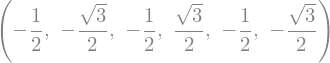

In [7]:
cos(-2*pi/3), sin(-2*pi/3), cos(-4*pi/3), sin(-4*pi/3), cos(-8*pi/3), sin(-8*pi/3)

Para uma matriz densidade de um qutrit,
$$\rho \doteq \begin{bmatrix}\rho_{0,0}&\rho_{0,1}&\rho_{0,2} \\ \rho_{1,0}&\rho_{1,1}&\rho_{1,2} \\ \rho_{2,0}&\rho_{2,1}&\rho_{2,2}\end{bmatrix},$$
a coerência norma $l_{1}$ é dada por
\begin{align}
C_{l_{1}}(\rho) & = \sum_{k\ne l}|\rho_{k,l}| = 2\big(|\rho_{0,1}|+|\rho_{0,2}|+|\rho_{1,2}|\big).
\end{align}

Para este estado evoluído sob dephasing de HW teremos
\begin{align}
C_{l_{1}}(\Lambda_{d}(\rho)) & = \sum_{k\ne l}\big|\Lambda_{d}(\rho)_{k,l}\big| \\
& = 2\big(\big|\Lambda_{d}(\rho)_{0,1}\big|+\big|\Lambda_{d}(\rho)_{0,2}\big|+\big|\Lambda_{d}(\rho)_{1,2}\big|\big).
\end{align}
Essa conta é longa, então vamos olhar termo a termo
\begin{align}
\big|\Lambda_{d}(\rho)_{0,1}\big| & = |\rho_{0,1}|\big(p_{0} + p_{1}e^{-i2\pi/3} + p_{2}e^{-i4\pi/3}\big)\big| \\
& = |\rho_{0,1}|\big(p_{0} + p_{1}e^{-i2\pi/3} + p_{2}e^{-i4\pi/3}\big)\big(p_{0} + p_{1}e^{i2\pi/3} + p_{2}e^{i4\pi/3}\big) \\
& = |\rho_{0,1}|\big(p_{0}^{2} + p_{1}^{2} + p_{2}^{2} + p_{0}p_{1}\big(e^{i2\pi/3}+e^{-i2\pi/3}\big) + p_{0}p_{2}\big(e^{i4\pi/3}+e^{-i4\pi/3}\big) + p_{1}p_{2}\big(e^{i2\pi/3}+e^{-i2\pi/3}\big)\big) \\
& = |\rho_{0,1}|\big(p_{0}^{2} + p_{1}^{2} + p_{2}^{2} + 2p_{0}p_{1}\cos(2\pi/3) + 2p_{0}p_{2}\cos(4\pi/3) + 2p_{1}p_{2}\cos(2\pi/3)\big) \\
& = |\rho_{0,1}|\big((2p_{0}^{2} + 2p_{1}^{2} + 2p_{2}^{2})/2 + 2p_{0}p_{1}(-1/2) + 2p_{0}p_{2}(-1/2) + 2p_{1}p_{2}(-1/2)\big) \\
& = \frac{1}{2}|\rho_{0,1}|\big((p_{0}-p_{1})^{2}+(p_{0}-p_{2})^{2}+(p_{1}-p_{2})^{2}\big)
\end{align}

Pode-se verificar (__exercício__) também que
\begin{align}
& \big|\Lambda_{d}(\rho)_{0,2}\big| = \frac{1}{2}|\rho_{0,2}|\big((p_{0}-p_{1})^{2}+(p_{0}-p_{2})^{2}+(p_{1}-p_{2})^{2}\big), \\
& \big|\Lambda_{d}(\rho)_{1,2}\big| = \frac{1}{2}|\rho_{1,2}|\big((p_{0}-p_{1})^{2}+(p_{0}-p_{2})^{2}+(p_{1}-p_{2})^{2}\big).
\end{align}
Com isso, podemos escrever a coerência quântica como
\begin{align}
C_{l_{1}}(\Lambda_{d}(\rho)) & = 2\big(|\rho_{0,1}|+|\rho_{0,2}|+|\rho_{1,2}|\big)\big((p_{0}-p_{1})^{2}+(p_{0}-p_{2})^{2}+(p_{1}-p_{2})^{2}\big)/2 \\
& = C_{l_{1}}(\rho)\big((p_{0}-p_{1})^{2}+(p_{0}-p_{2})^{2}+(p_{1}-p_{2})^{2}\big)/2.
\end{align}

Olhando para esta expressão, vemos que se as probabilidades são iguais, i.e., 
$$p_{0}=p_1=p_2=1/3\ \therefore\ C_{l_{1}}(\Lambda_{d}(\rho))=0,$$
como esperado. No entanto, se $p_0=1$ e $p_1=p_2=0$, teremos $C_{l_{1}}(\Lambda_{d}(\rho))=C_{l_{1}}(\rho)$, também é esperado pois $Z(0)=\mathbb{I}$. Na verdade, se só um dos operadores atua, ou seja, se só um dos estados base recebe uma mudança de fase, então a coerência não muda:
\begin{align}
& p_0=1,\ p_1=p_2=0\ \therefore\ C_{l_{1}}(\Lambda_{d}(\rho))=C_{l_{1}}(\rho), \\
& p_1=1,\ p_0=p_2=0\ \therefore\ C_{l_{1}}(\Lambda_{d}(\rho))=C_{l_{1}}(\rho), \\
& p_2=1,\ p_0=p_1=0\ \therefore\ C_{l_{1}}(\Lambda_{d}(\rho))=C_{l_{1}}(\rho).
\end{align}

## Qudit bit flip

De forma análoga ao que fizemos acima, podemos definir o canal de bit-flip de Heisenberg-Weyl como
$$\Lambda_{bf}(\rho) = \sum_{j=0}^{d-1}p_{j}X(j)\rho X(j)^{\dagger},$$
com $\{p_j\}$ sendo uma distribuição de probabilidades. Aqui é mais complicado ainda para se ter o que esperar sobre a ação do canal para qubits. Por isso, vamos olhar para alguns casos particulares. Termos assim que
\begin{align}
\Lambda_{bf}(\rho) & = \sum_{j=0}^{d-1}p_{j}X(j)\sum_{k,l=0}^{d-1}\rho_{k,l}|k\rangle\langle l| X(j)^{\dagger} \\
& = \sum_{k,l=0}^{d-1}\rho_{k,l}\sum_{j=0}^{d-1}p_{j}X(j)|k\rangle\langle l| X(j)^{\dagger} \\
& = \sum_{k,l=0}^{d-1}\rho_{k,l}\sum_{j=0}^{d-1}p_{j}|j\oplus k\rangle\langle j\oplus l|.
\end{align}
Essa expressão não ajuda muita de forma geral. Vamos olhar para alguns exemplos.

### $d=2$
Neste caso teremos
\begin{align}
\Lambda_{bf}(\rho) & = \sum_{j=0}^{1}p_{j}X(j)\rho X(j)^{\dagger} \\
& = p_{0}X(0)\rho X(0)^{\dagger} + p_{1}X(1)\rho X(1)^{\dagger} \\
& = p_{0}\rho + (1-p_{0})X\rho X,
\end{align}
que é o bem conhecido canal de inversão de bits para qubits.

### $d=3$
Neste caso teremos
\begin{align}
\Lambda_{bf}(\rho) & = \sum_{j=0}^{2}p_{j}X(j)\rho X(j)^{\dagger} \\
& = p_{0}X(0)\rho X(0)^{\dagger} + p_{1}X(1)\rho X(1)^{\dagger} + p_{2}X(2)\rho X(2)^{\dagger} \\
& = p_{0}\rho + p_{1}X(1)\rho X(1)^{\dagger} + p_{2}X(2)\rho X(2)^{\dagger}.
\end{align}
Temos que
\begin{align}
X(1)\rho X(1)^{\dagger} = & \sum_{k,l=0}^{2}\rho_{k,l}X(1)|k\rangle\langle l|X(1)^{\dagger} \\
= & \sum_{k,l=0}^{2}\rho_{k,l}|1\oplus k\rangle\langle 1\oplus l| \\
= & \rho_{0,0}|1\oplus 0\rangle\langle 1\oplus 0| + \rho_{0,1}|1\oplus 0\rangle\langle 1\oplus 1| + \rho_{0,2}|1\oplus 0\rangle\langle 1\oplus 2| \\
& + \rho_{1,0}|1\oplus 1\rangle\langle 1\oplus 0| + \rho_{1,1}|1\oplus 1\rangle\langle 1\oplus 1| + \rho_{1,2}|1\oplus 1\rangle\langle 1\oplus 2| \\
& + \rho_{2,0}|1\oplus 2\rangle\langle 1\oplus 0| + \rho_{2,1}|1\oplus 2\rangle\langle 1\oplus 1| + \rho_{2,2}|1\oplus 2\rangle\langle 1\oplus 2| \\
= & \rho_{0,0}|1\rangle\langle 1| + \rho_{0,1}|1\rangle\langle 2| + \rho_{0,2}|1\rangle\langle 0| \\
& + \rho_{1,0}|2\rangle\langle 1| + \rho_{1,1}|2\rangle\langle 2| + \rho_{1,2}|2\rangle\langle 0| \\
& + \rho_{2,0}|0\rangle\langle 1| + \rho_{2,1}|0\rangle\langle 2| + \rho_{2,2}|0\rangle\langle 0|
\end{align}

e
\begin{align}
X(2)\rho X(2)^{\dagger} = & \sum_{k,l=0}^{2}\rho_{k,l}X(2)|k\rangle\langle l|X(2)^{\dagger} \\
= & \sum_{k,l=0}^{2}\rho_{k,l}|2\oplus k\rangle\langle 2\oplus l| \\
= & \rho_{0,0}|2\oplus 0\rangle\langle 2\oplus 0| + \rho_{0,1}|2\oplus 0\rangle\langle 2\oplus 1| + \rho_{0,2}|2\oplus 0\rangle\langle 2\oplus 2| \\
& + \rho_{1,0}|2\oplus 1\rangle\langle 2\oplus 0| + \rho_{1,1}|2\oplus 1\rangle\langle 2\oplus 1| + \rho_{1,2}|2\oplus 1\rangle\langle 2\oplus 2| \\
& + \rho_{2,0}|2\oplus 2\rangle\langle 2\oplus 0| + \rho_{2,1}|2\oplus 2\rangle\langle 2\oplus 1| + \rho_{2,2}|2\oplus 2\rangle\langle 2\oplus 2| \\
= & \rho_{0,0}|2\rangle\langle 2| + \rho_{0,1}|2\rangle\langle 0| + \rho_{0,2}|2\rangle\langle 1| \\
& + \rho_{1,0}|0\rangle\langle 2| + \rho_{1,1}|0\rangle\langle 0| + \rho_{1,2}|0\rangle\langle 1| \\
& + \rho_{2,0}|1\rangle\langle 2| + \rho_{2,1}|1\rangle\langle 0| + \rho_{2,2}|1\rangle\langle 1|.
\end{align}

Com isso, o operador densidade evoluído é dado por
\begin{align}
\Lambda_{bf}(\rho) & = \big( p_{0}\rho_{0,0} + p_{1}\rho_{2,2} + p_{2}\rho_{1,1} \big)|0\rangle\langle 0| +  \big( p_{0}\rho_{0,1} + p_{1}\rho_{2,0} + p_{2}\rho_{1,2} \big)|0\rangle\langle 1| +  \big( p_{0}\rho_{0,2} + p_{1}\rho_{2,1} + p_{2}\rho_{1,0} \big)|0\rangle\langle 2| \\
 & = \big( p_{0}\rho_{1,0} + p_{1}\rho_{0,2} + p_{2}\rho_{2,1} \big)|1\rangle\langle 0| +  \big( p_{0}\rho_{1,1} + p_{1}\rho_{0,0} + p_{2}\rho_{2,2} \big)|1\rangle\langle 1| +  \big( p_{0}\rho_{1,2} + p_{1}\rho_{0,1} + p_{2}\rho_{2,0} \big)|1\rangle\langle 2| \\
& = \big( p_{0}\rho_{2,0} + p_{1}\rho_{1,2} + p_{2}\rho_{0,1} \big)|2\rangle\langle 0| +  \big( p_{0}\rho_{2,1} + p_{1}\rho_{1,0} + p_{2}\rho_{0,2} \big)|2\rangle\langle 1| +  \big( p_{0}\rho_{2,2} + p_{1}\rho_{1,1} + p_{2}\rho_{0,0} \big)|2\rangle\langle 2|.
\end{align}
Como esperado, é fácil ver que $Tr(\Lambda_{bf}(\rho))=1$. Note também que tanto as populações quanto as coerências são afetadas por este canal.

Para o cálculo da coerência quântica, notemos que
\begin{align}
\big|\Lambda_{bf}(\rho)_{0,1}\big|^{2} = & \big|p_{0}\rho_{0,1} + p_{1}\rho_{2,0} + p_{2}\rho_{1,2}\big|^{2} \\
= & \big(p_{0}\rho_{0,1} + p_{1}\rho_{2,0} + p_{2}\rho_{1,2}\big)\big(p_{0}\rho_{0,1}^{*} + p_{1}\rho_{2,0}^{*} + p_{2}\rho_{1,2}^{*} \big) \\
= & p_{0}^{2}|\rho_{0,1}|^{2} + p_{1}^{2}|\rho_{2,0}|^{2} + p_{2}^{2}\rho_{1,2}^{2} + 2p_{0}p_{1}\Re\big(\rho_{0,1}\rho_{2,0}^{*}\big) + 2p_{0}p_{2}\Re\big(\rho_{0,1}\rho_{1,2}^{*}\big)  + 2p_{1}p_{2}\Re\big(\rho_{2,0}\rho_{1,2}^{*}\big), \\
\big|\Lambda_{bf}(\rho)_{0,2}\big|^{2} = & p_{0}^{2}|\rho_{0,2}|^{2} + p_{1}^{2}|\rho_{2,1}|^{2} + p_{2}^{2}\rho_{1,0}^{2} + 2p_{0}p_{1}\Re\big(\rho_{0,2}\rho_{2,1}^{*}\big) + 2p_{0}p_{2}\Re\big(\rho_{0,2}\rho_{1,0}^{*}\big)  + 2p_{1}p_{2}\Re\big(\rho_{2,1}\rho_{1,0}^{*}\big), \\
\big|\Lambda_{bf}(\rho)_{1,2}\big|^{2} = & p_{0}^{2}|\rho_{1,2}|^{2} + p_{1}^{2}|\rho_{0,1}|^{2} + p_{2}^{2}\rho_{2,0}^{2} + 2p_{0}p_{1}\Re\big(\rho_{1,2}\rho_{0,1}^{*}\big) + 2p_{0}p_{2}\Re\big(\rho_{1,2}\rho_{2,0}^{*}\big)  + 2p_{1}p_{2}\Re\big(\rho_{0,1}\rho_{2,0}^{*}\big).
\end{align}

Pela forma das expressões, vemos que será difícil obter uma equação sucinta para a coerência norma l1. Por isso, vamos considerar a coerência norma l2 (que não é um monótono de coerência):
\begin{align}
C_{l_{2}}(\rho) = & \sum_{k\ne l}|\rho_{k,l}|^{2} \\
= & 2\big(\big|\Lambda_{bf}(\rho)_{0,1}\big|^{2} + \big|\Lambda_{bf}(\rho)_{0,2}\big|^{2} + \big|\Lambda_{bf}(\rho)_{1,2}\big|^{2}\big) \\
& = 2\big(\big(p_{0}^{2}+p_{1}^{2}+p_{2}^{2}\big)\big(|\rho_{0,1}|^{2}+|\rho_{0,2}|^{2}+|\rho_{1,2}|^{2}\big) + cdots
\end{align}

Parece que não simplifica. Então não consideraremos este canal para o artigo...

# Exercícios

1. Verifique que os operadores de Kraus
$$K_{j,k} = \sqrt{p_{j,k}}X(j)Z(k)$$
satisfazem a relação de completeza
$$\sum_{j,k}K_{j,k}^{\dagger}K_{j,k} = \mathbb{I}_{d}.$$

_SOL._ Usando
\begin{align}
Z(j)^{\dagger}Z(j) & = \sum_{k=0}^{d-1}e^{-i2\pi jk/d}|k\rangle\langle k|\sum_{l=0}^{d-1}e^{i2\pi jl/d}|l\rangle\langle l| \\
& = \sum_{k,l=0}^{d-1}e^{-i2\pi j(k-l)/d}|k\rangle\langle k|l\rangle\langle l| \\
& = \sum_{k,l=0}^{d-1}e^{-i2\pi j(k-l)/d}\delta_{k,l}|k\rangle\langle l| \\
& = \sum_{k=0}^{d-1}(1)|k\rangle\langle k| \\
& = \mathbb{I}.
\end{align}

e
\begin{align}
X(j)^{\dagger}X(j) & = \sum_{k=0}^{d-1}|k\rangle\langle j\oplus k|\sum_{l=0}^{d-1}|j\oplus l\rangle\langle l| \\
& = \sum_{k,l=0}^{d-1}|k\rangle\langle j\oplus k|j\oplus l\rangle\langle l| \\
& = \sum_{k,l=0}^{d-1}\delta_{k,l}|k\rangle\langle l| \\
& = \sum_{k=0}^{d-1}|k\rangle\langle k| \\
& = \mathbb{I}
\end{align}

teremos que
\begin{align}
\sum_{j,k=0}^{d-1}K_{j,k}^{\dagger}K_{j,k} & = \sum_{j,k=0}^{d-1}p_{j,k}Z(k)^{\dagger}X(j)^{\dagger}X(j)Z(k) \\
& = \sum_{j,k=0}^{d-1}p_{j,k}Z(k)^{\dagger}Z(k) \\
& = \sum_{j,k=0}^{d-1}p_{j,k}\mathbb{I}_{d} \\
& = \mathbb{I}_{d}.
\end{align}

### Referências

1. M. Wilde, Quantum information theory, Second edition. New York: Cambridge University Press, 2017.

1. T. F. Jordan, A. Shaji, and E. C. G. Sudarshan, “Maps for Lorentz transformations of spin,” Phys. Rev. A, vol. 73, no. 3, p. 032104, Mar. 2006, doi: 10.1103/PhysRevA.73.032104.
